In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [147]:
train_df=pd.read_csv(r'C:\Users\gokal\Desktop\Udemy\FINAL_TF2_FILES\TF_2_Notebooks_and_Data\GKLP\Kisisel Proje\House Prediction Project\train.csv')

In [148]:
test_df=pd.read_csv(r'C:\Users\gokal\Desktop\Udemy\FINAL_TF2_FILES\TF_2_Notebooks_and_Data\GKLP\Kisisel Proje\House Prediction Project\train.csv')

In [149]:
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Dropping Utilities because 1 value

In [150]:
train_df.drop('Utilities',axis=1,inplace=True)

Examine value counts for columns

In [151]:
train_df['MSSubClass'].value_counts()

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

In [152]:
for column in train_df.columns:
    print(f"Value counts for column: {column}")
    print(train_df[column].value_counts())
    print("-" * 40)


Value counts for column: Id
Id
1460    1
1       1
2       1
3       1
1444    1
       ..
9       1
8       1
7       1
6       1
5       1
Name: count, Length: 1460, dtype: int64
----------------------------------------
Value counts for column: MSSubClass
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64
----------------------------------------
Value counts for column: MSZoning
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
----------------------------------------
Value counts for column: LotFrontage
LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
182.0      1
160.0      1
152.0      1
153.0      1
46.0       1
Name: count, Length: 110, dtype: int64
----------------------------------------
Value counts for column: LotArea
LotA

In [153]:
train_df.isnull().sum()[train_df.isnull().sum() > 0]


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

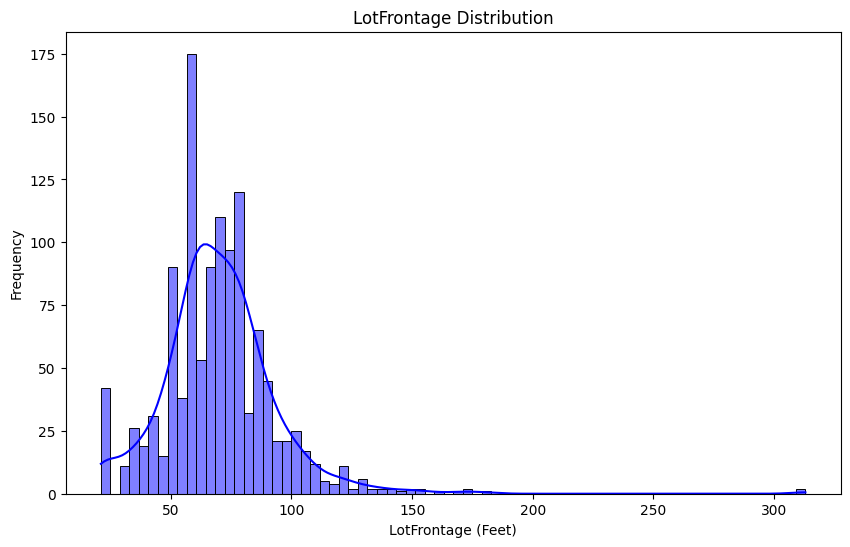

In [154]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['LotFrontage'].dropna(), kde=True, color='blue')
plt.title('LotFrontage Distribution')
plt.xlabel('LotFrontage (Feet)')
plt.ylabel('Frequency')
plt.show()

In [155]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [156]:
train_df.isnull().sum()[train_df.isnull().sum() > 0]


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

<Axes: >

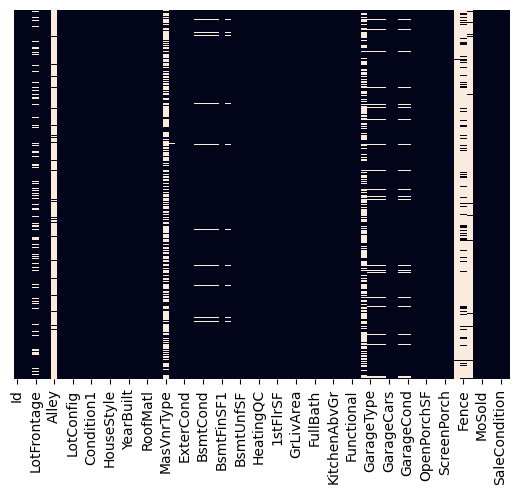

In [157]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False)

In [158]:
train_df.isnull().sum()[train_df.isnull().sum() > 0]


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [159]:
train_df['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [160]:
train_df['GarageYrBlt'].value_counts()

GarageYrBlt
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1900.0     1
1927.0     1
1906.0     1
1908.0     1
1933.0     1
Name: count, Length: 97, dtype: int64

In [161]:
train_df.isnull().sum()[train_df.isnull().sum() > 0]


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [162]:
train_df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [163]:
#train_df.drop('Id',axis=1,inplace=True)

In [164]:
#train_df.corr(method='pearson', numeric_only=True)['SalePrice'].sort_values()


In [165]:
main_df=train_df.copy()

In [166]:
train_df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [167]:
train_df.isnull().sum()[train_df.isnull().sum() > 0]


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

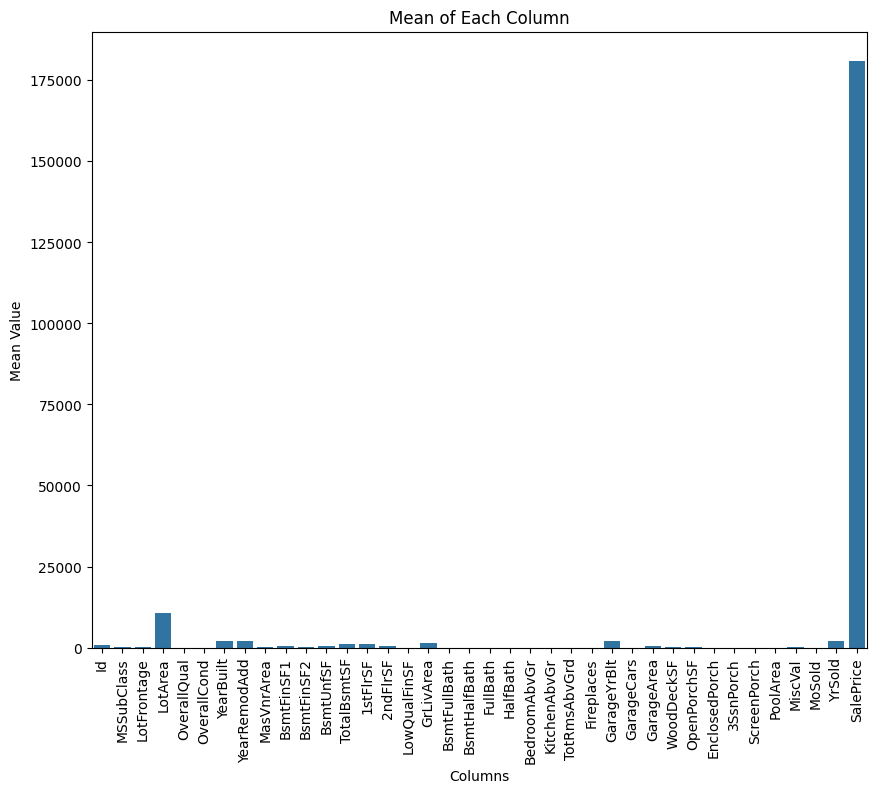

In [168]:
mean_values = train_df.select_dtypes(include='number').mean()

plt.figure(figsize=(10, 8))
sns.barplot(x=mean_values.index, y=mean_values.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Mean Value")
plt.title("Mean of Each Column")
plt.show()

Outlier Part

In [169]:
def detect_outliers_iqr(df):
    outlier_cols = []
    for col in df.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))].index
        if len(outliers) > 0:
            outlier_cols.append(col)
    return outlier_cols

outlier_features = detect_outliers_iqr(train_df)
print("IQR Outlying Features:", outlier_features)

IQR Outlying Features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

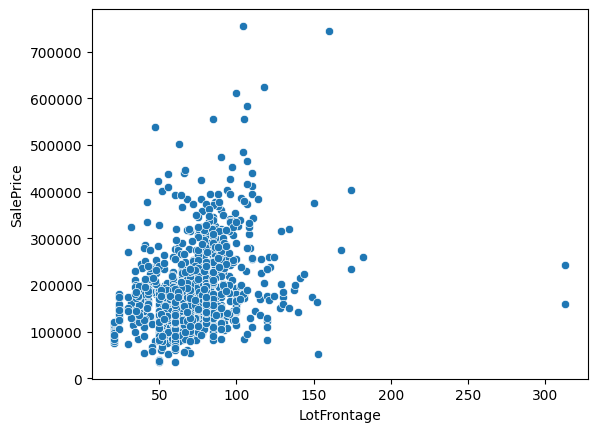

In [170]:
sns.scatterplot(x='LotFrontage',y='SalePrice',data=train_df)

In [171]:
train_df.query('LotFrontage>300')
#train_df.drop(935,1299)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,Inside,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


<Axes: xlabel='LotArea', ylabel='SalePrice'>

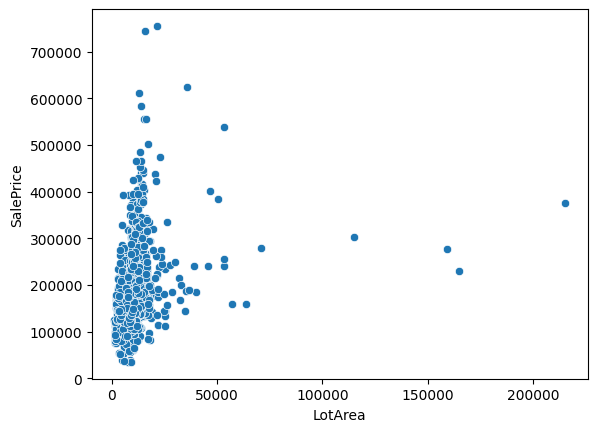

In [172]:
sns.scatterplot(x='LotArea',y='SalePrice',data=train_df)

In [173]:
train_df.query('LotArea>56000')
#train_df.drop(250,314,336,707, 1397)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,CulDSac,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,Corner,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,Inside,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,CulDSac,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,Inside,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000


In [174]:
import scipy.stats as stats

In [175]:
pd.Series(stats.zscore(train_df['LotArea'])).sort_values().tail(10)

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
dtype: float64

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

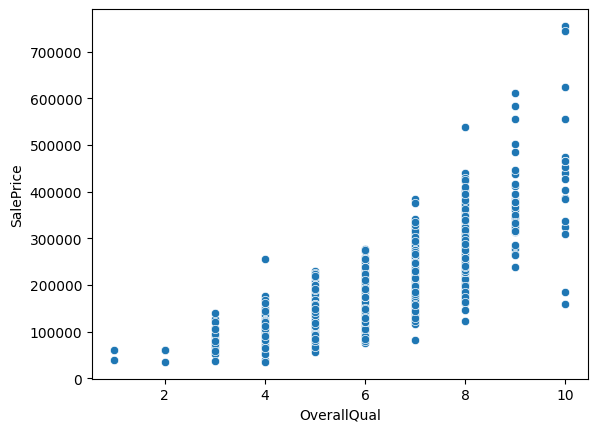

In [176]:
sns.scatterplot(x='OverallQual',y='SalePrice',data=train_df)

In [177]:
train_df.query('OverallQual==10').sort_values(by='SalePrice')
#524

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1442,1443,60,FV,85.0,11003,Pave,NaN,Reg,Lvl,Inside,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,310000
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
994,995,20,RL,96.0,12456,Pave,NaN,Reg,Lvl,FR2,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,337500
825,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,Inside,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
224,225,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
515,516,20,RL,94.0,12220,Pave,NaN,Reg,Lvl,Inside,...,0,NaN,NaN,NaN,0,9,2009,New,Partial,402861
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,Inside,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,CulDSac,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780


IQR Outlying Features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

<Axes: xlabel='BsmtFinSF1', ylabel='SalePrice'>

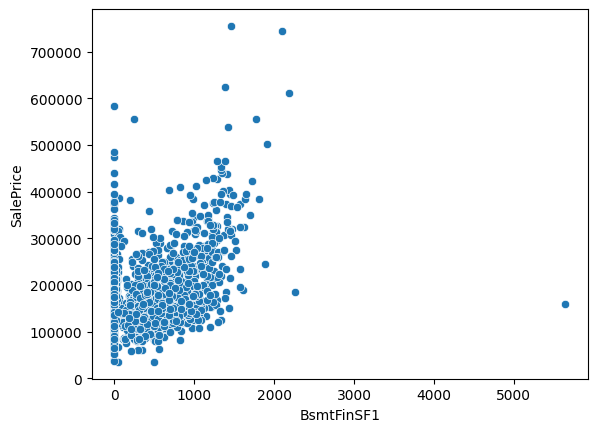

In [178]:
sns.scatterplot(x='BsmtFinSF1',y='SalePrice',data=train_df)

In [179]:
train_df.query('BsmtFinSF1>5000').sort_values(by='SalePrice')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


<Axes: xlabel='OpenPorchSF', ylabel='SalePrice'>

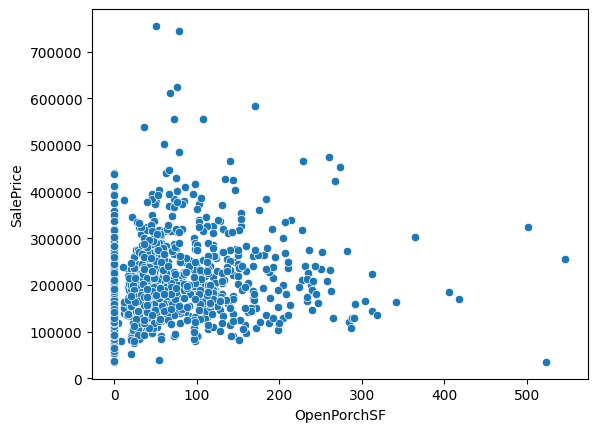

In [180]:
sns.scatterplot(x='OpenPorchSF',y='SalePrice',data=train_df)

In [181]:
pd.Series(stats.zscore(train_df['OpenPorchSF'])).sort_values().tail(10)

807     4.006136
645     4.006136
996     4.111823
735     4.443982
875     4.791239
523     5.425361
854     5.606538
583     6.874782
495     7.191843
1328    7.554198
dtype: float64

In [182]:
train_df[train_df['OpenPorchSF'] > 500]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,Inside,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,Corner,...,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000


<Axes: xlabel='KitchenAbvGr', ylabel='SalePrice'>

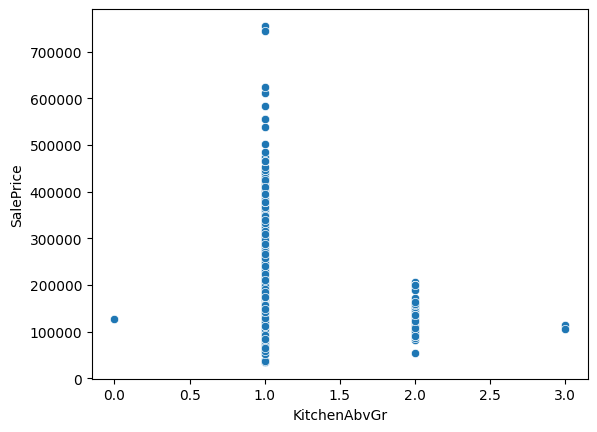

In [183]:
sns.scatterplot(x='KitchenAbvGr',y='SalePrice',data=train_df)

In [184]:
train_df.query('KitchenAbvGr> 2.5')
#49 810

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,Inside,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
809,810,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,Corner,...,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000


<Axes: xlabel='BedroomAbvGr', ylabel='SalePrice'>

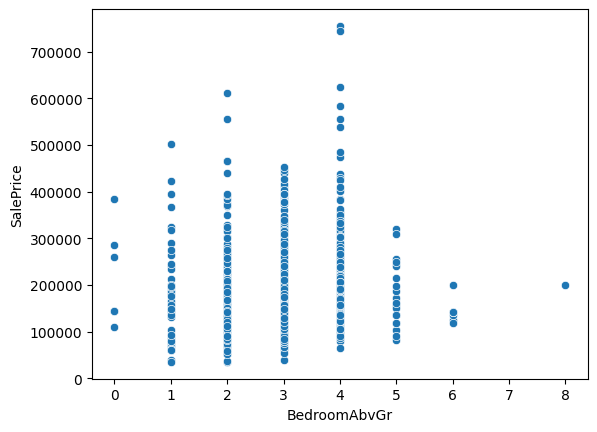

In [185]:
sns.scatterplot(x='BedroomAbvGr',y='SalePrice',data=train_df)

In [186]:
train_df.query('BedroomAbvGr> 7.5')
#636	

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,Inside,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


<Axes: xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

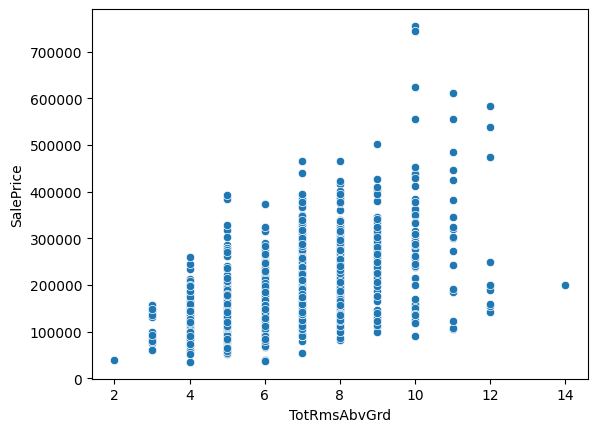

In [187]:
sns.scatterplot(x='TotRmsAbvGrd',y='SalePrice',data=train_df)

In [188]:
train_df.query('TotRmsAbvGrd== 14')
#636	

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,Inside,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


<Axes: xlabel='Fireplaces', ylabel='SalePrice'>

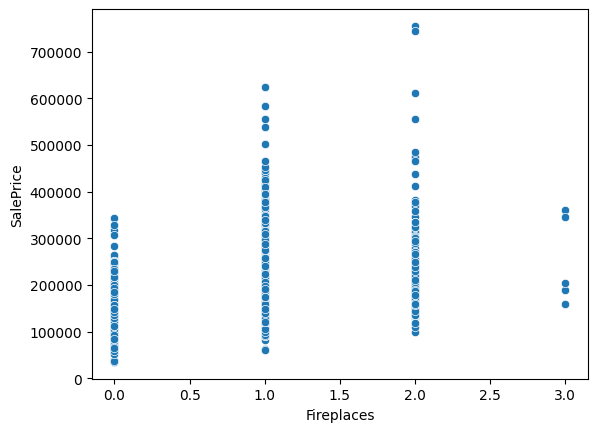

In [189]:
sns.scatterplot(x='Fireplaces',y='SalePrice',data=train_df)

In [190]:
train_df.query('Fireplaces== 3')
#	

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
166,167,20,RL,NaN,10708,Pave,NaN,IR1,Lvl,Inside,...,0,NaN,GdWo,NaN,0,11,2009,COD,Normal,190000
309,310,20,RL,90.0,12378,Pave,NaN,IR1,Lvl,Inside,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,360000
605,606,60,RL,85.0,13600,Pave,NaN,Reg,Lvl,Inside,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,205000
642,643,80,RL,75.0,13860,Pave,NaN,Reg,Lvl,Inside,...,0,NaN,MnPrv,NaN,0,7,2009,WD,Normal,345000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


<Axes: xlabel='GarageArea', ylabel='SalePrice'>

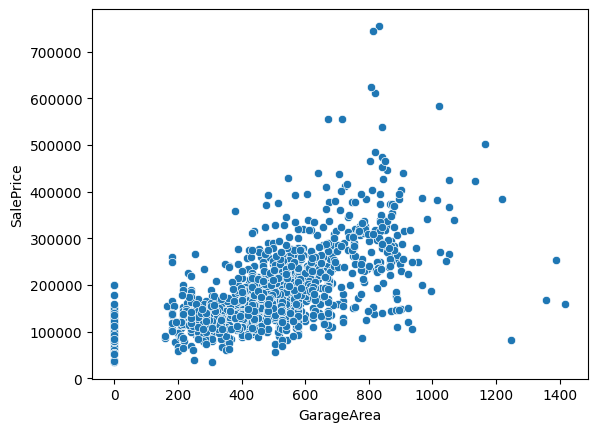

In [191]:
sns.scatterplot(x='GarageArea',y='SalePrice',data=train_df)

In [192]:
train_df.query('Fireplaces== 3')
#	

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
166,167,20,RL,NaN,10708,Pave,NaN,IR1,Lvl,Inside,...,0,NaN,GdWo,NaN,0,11,2009,COD,Normal,190000
309,310,20,RL,90.0,12378,Pave,NaN,IR1,Lvl,Inside,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,360000
605,606,60,RL,85.0,13600,Pave,NaN,Reg,Lvl,Inside,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,205000
642,643,80,RL,75.0,13860,Pave,NaN,Reg,Lvl,Inside,...,0,NaN,MnPrv,NaN,0,7,2009,WD,Normal,345000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [193]:
train_df.query('GarageArea >1200')
#	1062,1191 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,Inside,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
825,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,Inside,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,Inside,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,Inside,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


<Axes: xlabel='WoodDeckSF', ylabel='SalePrice'>

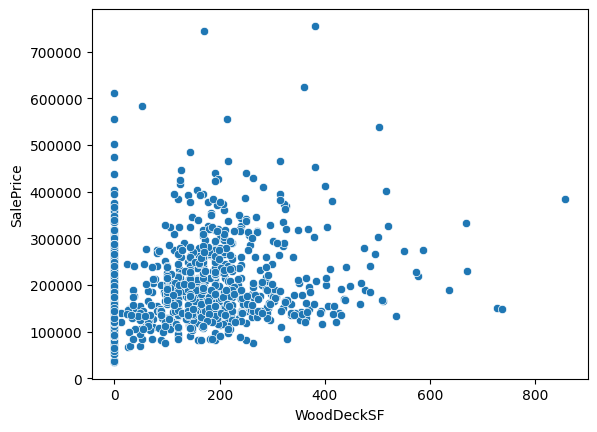

In [194]:
sns.scatterplot(x='WoodDeckSF',y='SalePrice',data=train_df)

In [195]:
train_df.query('WoodDeckSF >800')
#	1062,1191

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,Inside,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000


<Axes: xlabel='OpenPorchSF', ylabel='SalePrice'>

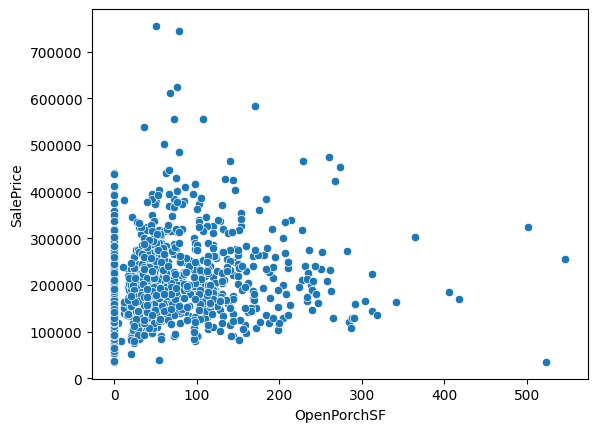

In [196]:
sns.scatterplot(x='OpenPorchSF',y='SalePrice',data=train_df)

In [197]:
train_df.query('OpenPorchSF >450')
#	496,584

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,Inside,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,Corner,...,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000


<Axes: xlabel='EnclosedPorch', ylabel='SalePrice'>

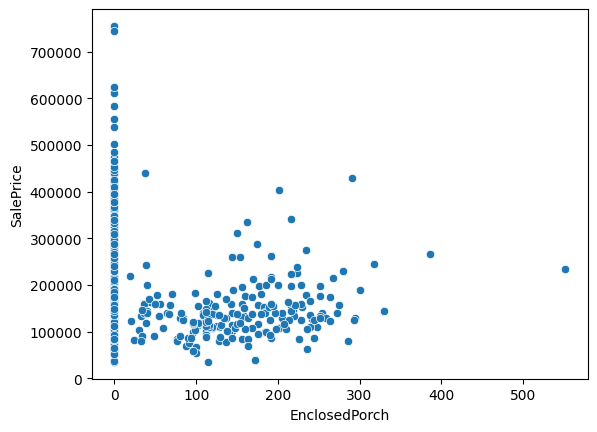

In [198]:
sns.scatterplot(x='EnclosedPorch',y='SalePrice',data=train_df)

In [199]:
train_df.query('EnclosedPorch > 500')
#	198

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,Corner,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000


<Axes: xlabel='PoolArea', ylabel='SalePrice'>

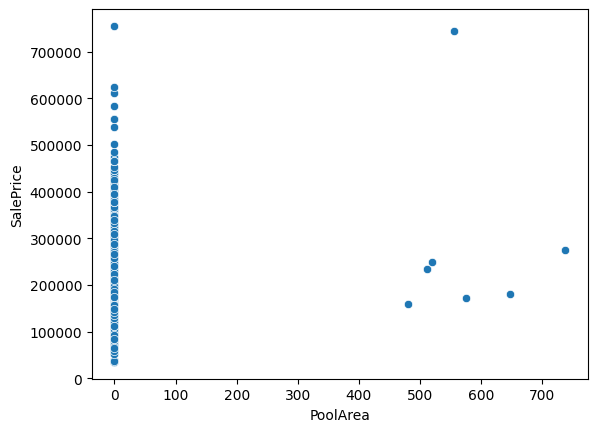

In [200]:
sns.scatterplot(x='PoolArea',y='SalePrice',data=train_df)

GarageType: object
GarageYrBlt: float64
GarageFinish: object
GarageCars: int64
GarageArea: int64
GarageQual: object
GarageCond: object
PavedDrive: object
WoodDeckSF: int64
OpenPorchSF: int64
EnclosedPorch: int64
3SsnPorch: int64
ScreenPorch: int64
PoolArea: int64
MiscVal: int64
MoSold: int64
YrSold: int64
SaleType: object
SaleCondition: object
SalePrice: int64
FireplaceExists: int64

In [201]:
for column in train_df.columns:
    print(f"{column}: {train_df[column].dtype}")

Id: int64
MSSubClass: int64
MSZoning: object
LotFrontage: float64
LotArea: int64
Street: object
Alley: object
LotShape: object
LandContour: object
LotConfig: object
LandSlope: object
Neighborhood: object
Condition1: object
Condition2: object
BldgType: object
HouseStyle: object
OverallQual: int64
OverallCond: int64
YearBuilt: int64
YearRemodAdd: int64
RoofStyle: object
RoofMatl: object
Exterior1st: object
Exterior2nd: object
MasVnrType: object
MasVnrArea: float64
ExterQual: object
ExterCond: object
Foundation: object
BsmtQual: object
BsmtCond: object
BsmtExposure: object
BsmtFinType1: object
BsmtFinSF1: int64
BsmtFinType2: object
BsmtFinSF2: int64
BsmtUnfSF: int64
TotalBsmtSF: int64
Heating: object
HeatingQC: object
CentralAir: object
Electrical: object
1stFlrSF: int64
2ndFlrSF: int64
LowQualFinSF: int64
GrLivArea: int64
BsmtFullBath: int64
BsmtHalfBath: int64
FullBath: int64
HalfBath: int64
BedroomAbvGr: int64
KitchenAbvGr: int64
KitchenQual: object
TotRmsAbvGrd: int64
Functional: obje

In [202]:
train_df.shape

(1460, 80)

In [203]:
values= [524,1299, 1328,1062,1191 ,1062,1191,496,584,198 ,935,1299,250, 314, 336, 707, 1397]

In [204]:
train_df=train_df[train_df.Id.isin(values)==False]

In [205]:
train_df.shape

(1446, 80)

In [206]:
train_df.isnull().sum()[train_df.isnull().sum()>0]

LotFrontage      254
Alley           1355
MasVnrType       863
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      688
GarageType        80
GarageYrBlt       80
GarageFinish      80
GarageQual        80
GarageCond        80
PoolQC          1441
Fence           1168
MiscFeature     1395
dtype: int64

In [207]:
train_df['Alley'].fillna('No', inplace=True)
test_df['Alley'].fillna('No', inplace=True)

C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\2277165759.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Alley'].fillna('No', inplace=True)
C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\2277165759.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [208]:
train_df['Fence'].fillna('No', inplace=True)
test_df['Fence'].fillna('No', inplace=True)

C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\3730986352.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Fence'].fillna('No', inplace=True)
C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\3730986352.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [209]:
train_df['MasVnrType'].fillna('No', inplace=True)
test_df['MasVnrType'].fillna('No', inplace=True)

C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\2175816292.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrType'].fillna('No', inplace=True)
C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\2175816292.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [210]:
train_df['MasVnrArea'].fillna(0, inplace=True)
test_df['MasVnrArea'].fillna(0, inplace=True)

C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\3657060107.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrArea'].fillna(0, inplace=True)
C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\3657060107.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [211]:
train_df['FireplaceQu'].fillna('No', inplace=True)
test_df['FireplaceQu'].fillna('No', inplace=True)

C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\2825947256.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['FireplaceQu'].fillna('No', inplace=True)
C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\2825947256.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [212]:
train_df['LotFrontage'].fillna(0, inplace=True)
test_df['LotFrontage'].fillna(0, inplace=True)

C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\1334701034.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['LotFrontage'].fillna(0, inplace=True)
C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\1334701034.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [213]:
train_df['GarageCond'].fillna('No', inplace=True)
test_df['GarageCond'].fillna('No', inplace=True)

C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\1255948083.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageCond'].fillna('No', inplace=True)
C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\1255948083.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [214]:
train_df['GarageType'].fillna('No', inplace=True)
test_df['GarageType'].fillna('No', inplace=True)

C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\3721453499.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageType'].fillna('No', inplace=True)
C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\3721453499.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [215]:
train_df['GarageFinish'].fillna('No', inplace=True)
test_df['GarageFinish'].fillna('No', inplace=True)

C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\2912414829.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageFinish'].fillna('No', inplace=True)
C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\2912414829.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [216]:
train_df['GarageQual'].fillna('No', inplace=True)
test_df['GarageQual'].fillna('No', inplace=True)

C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\94532614.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageQual'].fillna('No', inplace=True)
C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\94532614.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [217]:
train_df['BsmtFinType2'].fillna('Unf', inplace=True)
test_df['BsmtFinType2'].fillna('Unf', inplace=True)

C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\1071294587.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtFinType2'].fillna('Unf', inplace=True)
C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\1071294587.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [218]:
train_df['BsmtExposure'].fillna('No', inplace=True)
test_df['BsmtExposure'].fillna('No', inplace=True)

C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\2040818772.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtExposure'].fillna('No', inplace=True)
C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\2040818772.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [219]:
train_df['BsmtCond'].fillna('No', inplace=True)
test_df['BsmtCond'].fillna('No', inplace=True)

C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\2806626140.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtCond'].fillna('No', inplace=True)
C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\2806626140.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [220]:
train_df['BsmtQual'].fillna('No', inplace=True)
test_df['BsmtQual'].fillna('No', inplace=True)

C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\2878576625.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtQual'].fillna('No', inplace=True)
C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\2878576625.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [221]:
train_df['BsmtFinType1'].fillna('Unf', inplace=True)
test_df['BsmtFinType1'].fillna('Unf', inplace=True)

C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\3531540711.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtFinType1'].fillna('Unf', inplace=True)
C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\3531540711.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [222]:
train_df['MasVnrArea'].fillna(0, inplace=True)
test_df['MasVnrArea'].fillna(0, inplace=True)

C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\3657060107.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrArea'].fillna(0, inplace=True)
C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\3657060107.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [223]:
train_df['Electrical'].fillna('SBrkr', inplace=True)
test_df['Electrical'].fillna('SBrkr', inplace=True)

C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\4245203846.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Electrical'].fillna('SBrkr', inplace=True)
C:\Users\gokal\AppData\Local\Temp\ipykernel_16124\4245203846.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

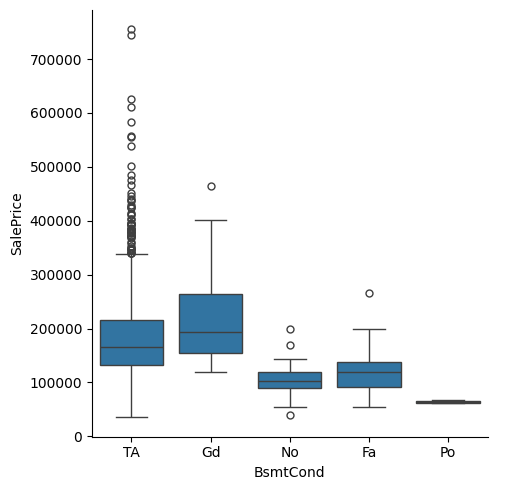

In [224]:
sns.catplot(data=train_df,x="BsmtCond",y='SalePrice',kind='box')

In [225]:
train_df = train_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])
test_df = test_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])

In [226]:
train_df.isnull().sum()[train_df.isnull().sum()>0]

Series([], dtype: int64)

Feature Engineering on Train Dataset

In [227]:
train_df['MasVnrType'].unique()

array(['BrkFace', 'No', 'Stone', 'BrkCmn'], dtype=object)

In [228]:
train_df['HouseAge']=train_df['YrSold']-train_df['YearBuilt']

In [229]:
train_df['houseremodelage']=train_df['YrSold']-train_df['YearRemodAdd']

In [230]:
train_df['totalsf']=train_df['1stFlrSF']+train_df['2ndFlrSF']+train_df['BsmtFinSF1']+train_df['BsmtFinSF2']

In [231]:
train_df['totalarea']=train_df['GrLivArea']+train_df['TotalBsmtSF']

In [232]:
train_df['totalbaths']=train_df['BsmtFullBath']+train_df['FullBath']+0.5*(train_df['BsmtHalfBath']+train_df['HalfBath'])

In [233]:
train_df['totalporchsf'] = train_df['OpenPorchSF'] + train_df['3SsnPorch'] + train_df['EnclosedPorch'] + train_df['ScreenPorch'] + train_df['WoodDeckSF']

In [234]:
train_df = train_df.drop(columns=['Id','YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

Correlation Matrix For the Columns

<Axes: >

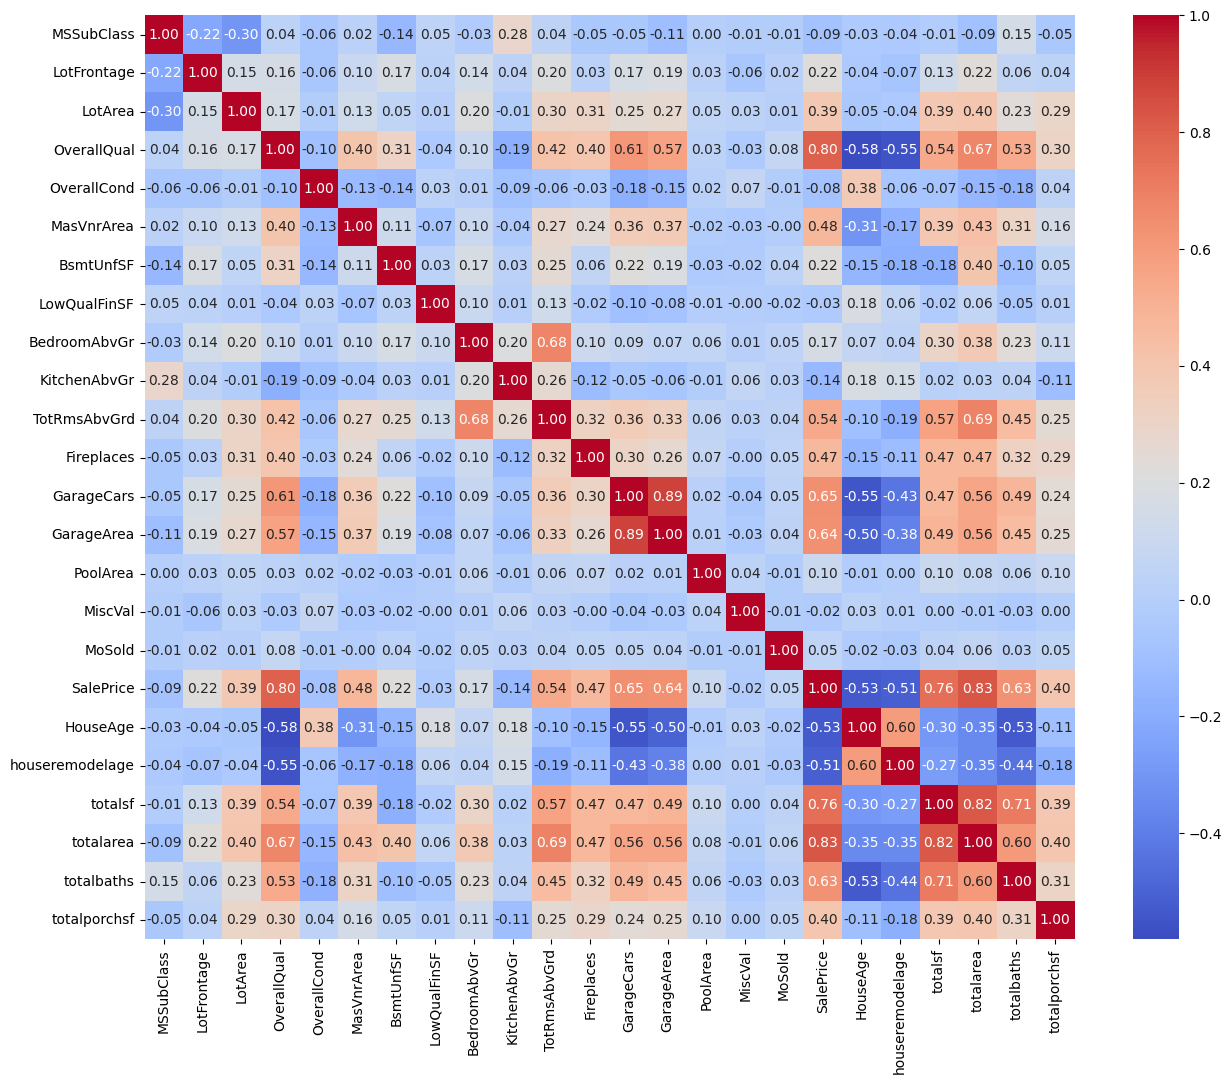

In [235]:
correlation_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

Garage Area And Garage Cars shares same corr so drop one

In [236]:
train_df = train_df.drop(columns=['GarageArea'])

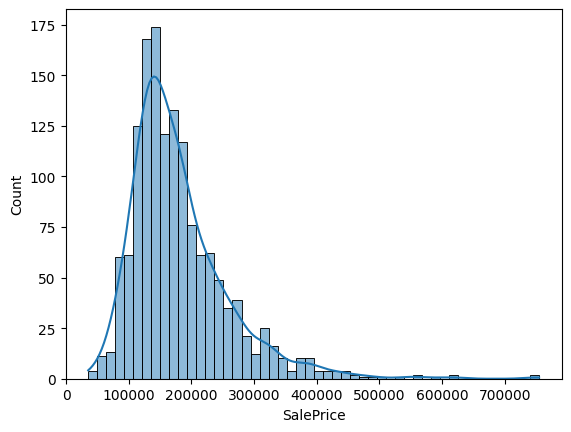

In [237]:
sns.histplot(train_df['SalePrice'], bins=50, kde=True)  
plt.show()


In [238]:
from scipy.stats import skew

print("Skew Score:", skew(train_df['SalePrice']))


Skew Score: 1.908013931317219


In [239]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

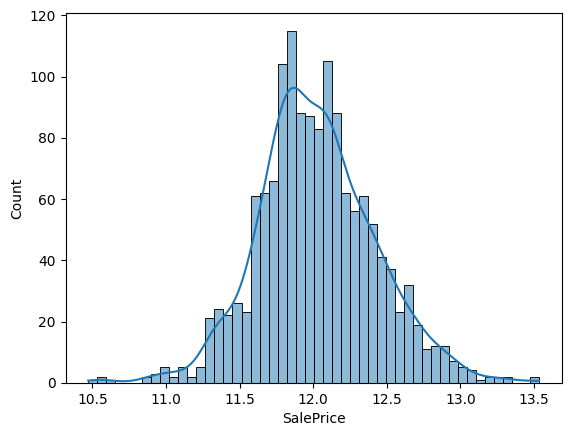

In [240]:
sns.histplot(train_df['SalePrice'], bins=50, kde=True)  

In [241]:

print(train_df.dtypes)


MSSubClass           int64
MSZoning            object
LotFrontage        float64
LotArea              int64
Street              object
LotShape            object
LandContour         object
LotConfig           object
LandSlope           object
Neighborhood        object
Condition1          object
Condition2          object
BldgType            object
HouseStyle          object
OverallQual          int64
OverallCond          int64
RoofStyle           object
RoofMatl            object
Exterior1st         object
Exterior2nd         object
MasVnrType          object
MasVnrArea         float64
ExterQual           object
ExterCond           object
Foundation          object
BsmtQual            object
BsmtCond            object
BsmtExposure        object
BsmtFinType1        object
BsmtUnfSF            int64
Heating             object
HeatingQC           object
CentralAir          object
Electrical          object
LowQualFinSF         int64
BedroomAbvGr         int64
KitchenAbvGr         int64
K

In [242]:
categorical_columns = train_df.select_dtypes(include=['object']).columns.tolist()
categorical_columns


['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [243]:
for col in categorical_columns:
    print(f"{col}: {train_df[col].nunique()} unique values")


MSZoning: 5 unique values
Street: 2 unique values
LotShape: 4 unique values
LandContour: 4 unique values
LotConfig: 5 unique values
LandSlope: 3 unique values
Neighborhood: 25 unique values
Condition1: 9 unique values
Condition2: 7 unique values
BldgType: 5 unique values
HouseStyle: 8 unique values
RoofStyle: 6 unique values
RoofMatl: 7 unique values
Exterior1st: 15 unique values
Exterior2nd: 16 unique values
MasVnrType: 4 unique values
ExterQual: 4 unique values
ExterCond: 5 unique values
Foundation: 6 unique values
BsmtQual: 5 unique values
BsmtCond: 5 unique values
BsmtExposure: 4 unique values
BsmtFinType1: 6 unique values
Heating: 6 unique values
HeatingQC: 5 unique values
CentralAir: 2 unique values
Electrical: 5 unique values
KitchenQual: 4 unique values
Functional: 7 unique values
FireplaceQu: 6 unique values
GarageType: 7 unique values
GarageFinish: 4 unique values
GarageQual: 6 unique values
PavedDrive: 3 unique values
SaleType: 9 unique values
SaleCondition: 6 unique values


In [244]:
for col in categorical_columns:
    print(f"Frequencies of {col}:")
    print(train_df[col].value_counts())
    print("\n")


Frequencies of MSZoning:
MSZoning
RL         1140
RM          217
FV           65
RH           16
C (all)       8
Name: count, dtype: int64


Frequencies of Street:
Street
Pave    1442
Grvl       4
Name: count, dtype: int64


Frequencies of LotShape:
LotShape
Reg    919
IR1    481
IR2     38
IR3      8
Name: count, dtype: int64


Frequencies of LandContour:
LandContour
Lvl    1307
Bnk      60
HLS      48
Low      31
Name: count, dtype: int64


Frequencies of LotConfig:
LotConfig
Inside     1043
Corner      260
CulDSac      92
FR2          47
FR3           4
Name: count, dtype: int64


Frequencies of LandSlope:
LandSlope
Gtl    1375
Mod      63
Sev       8
Name: count, dtype: int64


Frequencies of Neighborhood:
Neighborhood
NAmes      223
CollgCr    150
OldTown    112
Edwards     98
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     47
NoRidge     41
Timber      35
IDOTRR      35
ClearCr     26
SWISU      

one_hot_encoding_columns=['MSZoning','Street','LotConfig','LandContour','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']

In [245]:
one_hot_encoding_columns=['MSZoning','Street','LotConfig','LandContour','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']

ordinal_encoding_columns=['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','HeatingQC','KitchenQual','FireplaceQu','GarageQual','BsmtFinType1','LotShape','LandSlope','GarageFinish']

In [246]:
ordinal_encoding_columns=['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','HeatingQC','KitchenQual','FireplaceQu','GarageQual','BsmtFinType1','LotShape','LandSlope','GarageFinish']

In [247]:
non_categorical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns
non_categorical_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtUnfSF', 'LowQualFinSF', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea',
       'MiscVal', 'MoSold', 'SalePrice', 'HouseAge', 'houseremodelage',
       'totalsf', 'totalarea', 'totalbaths', 'totalporchsf'],
      dtype='object')

In [248]:
non_categorical_columns = non_categorical_columns.drop('SalePrice')

Preprocessing with Pipeline

In [249]:
num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [250]:
from sklearn.preprocessing import OrdinalEncoder

In [251]:
ode_pipeline = Pipeline(steps=[
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [252]:

ohe_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [253]:

col_trans = ColumnTransformer(transformers=[
    ('num_p', num_pipeline, non_categorical_columns),
    ('ode_p', ode_pipeline, ordinal_encoding_columns),
    ('ohe_p', ohe_pipeline, one_hot_encoding_columns)
], remainder='passthrough', n_jobs=-1)

In [254]:
pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])

Train test splitting

In [255]:
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

In [256]:
X_preprocessed = pipeline.fit_transform(X)

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=25)

In [258]:
lr=LinearRegression()

In [259]:
lr.fit(X_train,y_train)

LinearRegression()

In [260]:
y_pred_lr=lr.predict(X_test)

In [261]:
mean_squared_error(y_test,y_pred_lr)

0.014863046528803618

In [262]:
r2_score(y_test,y_pred_lr)

0.9144196671157712

In [263]:
lr_y_train_pred = lr.predict(X_train)
lr_train_r2 = r2_score(y_train, lr_y_train_pred)
lr_train_mse = mean_squared_error(y_train, lr_y_train_pred)

In [264]:
lr_y_test_pred = lr.predict(X_test)
lr_test_r2 = r2_score(y_test, lr_y_test_pred)
lr_test_mse = mean_squared_error(y_test, lr_y_test_pred)

In [265]:
print(f"Train R²: {lr_train_r2:.4f}, Train MSE: {lr_train_mse:.4f}")
print(f"Test R²: {lr_test_r2:.4f}, Test MSE: {lr_test_mse:.4f}")

Train R²: 0.9444, Train MSE: 0.0085
Test R²: 0.9144, Test MSE: 0.0149


In [266]:
RFR= RandomForestRegressor(random_state=42)

In [267]:
RFR_params_grid={
    'max_depth': [5,10, 15, 20],
    'n_estimators': [100, 250, 350],
    'min_samples_split': [3, 5, 15],
}

In [268]:
from sklearn.model_selection import GridSearchCV

In [269]:
RFR_grid_search= GridSearchCV(RFR, RFR_params_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [270]:
RFR_grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_split': [3, 5, 15],
                         'n_estimators': [100, 250, 350]},
             scoring='neg_mean_squared_error')

In [271]:
RFR_y_pred=RFR_grid_search.predict(X_test)

In [272]:
r2_score(y_test,RFR_y_pred)

0.8922848192566597

In [273]:
mean_squared_error(y_test,RFR_y_pred)

0.018707285766374874

In [274]:
from sklearn.ensemble import GradientBoostingRegressor  

In [275]:
GBR=GradientBoostingRegressor(random_state=55)

In [276]:
GBR_params_grid={
    "n_estimators": [100, 200, 300],  
    "learning_rate": [0.01, 0.1],  
    "max_depth": [3, 5],  
    "min_samples_split": [2, 5, 10],  
    "min_samples_leaf": [2, 5],  
    "subsample": [0.8, 0.9, 1.0],  
    "max_features": [10, 20, "sqrt", "log2"],  
}

In [277]:
GBR_grid_search = GridSearchCV(
    GBR, param_grid=GBR_params_grid,
    cv=5, 
    scoring='r2',  
    n_jobs=-1,  
    verbose=2,  
)

In [284]:
GBR_grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=55),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'max_features': [10, 20, 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='r2', verbose=2)

In [287]:
GBR_grid_search.best_score_

np.float64(0.9130475737074317)

In [295]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input

In [299]:
model=Sequential()

In [301]:

model.add(Input(shape=(204,))) 


model.add(Dense(256, activation='relu'))  
model.add(Dense(128, activation='relu'))  
model.add(Dense(64, activation='relu')) 

model.add(Dense(1, activation='linear'))  # Fiyat tahmini için


model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [303]:
from tensorflow.keras.callbacks import EarlyStopping

In [304]:
early_stop=EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,              
    batch_size=16,          
    callbacks=[early_stop],  
    verbose=1                
)

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 34.9389 - val_accuracy: 0.0000e+00 - val_loss: 0.5302
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.3774 - val_accuracy: 0.0000e+00 - val_loss: 0.2918
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.2033 - val_accuracy: 0.0000e+00 - val_loss: 0.1904
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.1416 - val_accuracy: 0.0000e+00 - val_loss: 0.1432
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0804 - val_accuracy: 0.0000e+00 - val_loss: 0.1143
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0663 - val_accuracy: 0.0000e+00 - val_loss: 0.1069
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0411 - val_accuracy: 0.0000e+00 - val_loss: 0.0906
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a

In [306]:
losses=pd.DataFrame(model.history.history)

<Axes: >

<Figure size 1200x800 with 0 Axes>

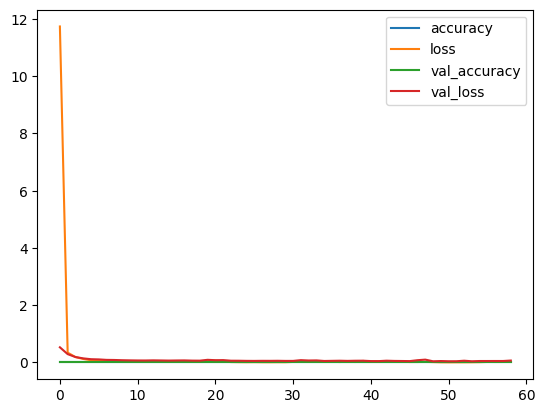

In [308]:
plt.figure(figsize=(12,8))
losses.plot()

In [309]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score


In [312]:
BNN_predictions=model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [313]:
np.sqrt(mean_squared_error(y_test,BNN_predictions))

np.float64(0.2595577287589672)

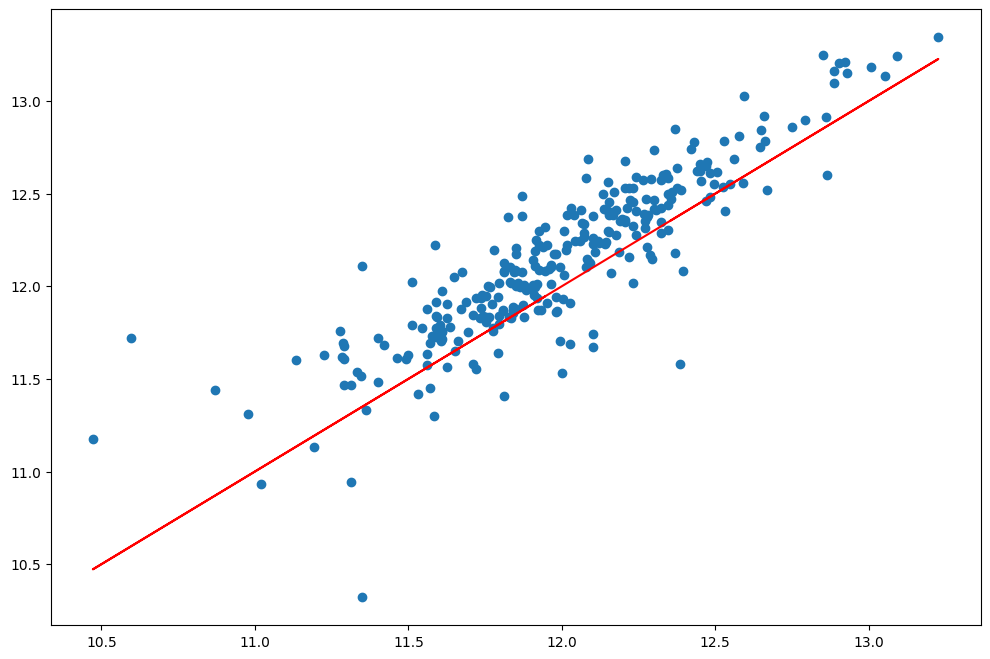

In [314]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,BNN_predictions)
plt.plot(y_test,y_test,'r')